# Experiments on "Maximizing the Spread of Influence through a Social Network"

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

from InfluenceDiffusion import *

## Reading Data

Here we import the data from [2016 Democratic National Committee email leak](http://networkrepository.com/email-dnc.php),
 an email communication network. Nodes in the network correspond to persons in the
 dataset. A directed edge in the dataset denotes that a person has sent an email to
  another person. The nature of emailing results in a directed multigraph.
  Here we ignore the time variable.

In [2]:
multigraph, directed_graph = read_data()

## Three Diffusion Models

In this paper, we have three types of influence diffusion models: linear threshold model (node-specific threshold),
independent cascade model (dynamic cascade), and "weighted" cascade model.

By specifying the argument _mode_ in function *begin_diffusion*, we can choose the
influence model to experiment. Here let node 1 be the initial size-1 set to target.
And the uniform probability in independent cascade model for edges is set to 0.01.

In [3]:
result = begin_diffusion(initial_set={1},
                underlying_graph=directed_graph,
                max_iter=100,
                mode='linear threshold')
print("# final active nodes: ", result[1])

# final active nodes:  98


In [4]:
result = begin_diffusion(initial_set={1},
                underlying_graph=directed_graph,
                max_iter=100,
                mode='independent cascade',
                         p_cascade=0.01)
print("# final active nodes: ", result[1])

# final active nodes:  185


In [5]:
result = begin_diffusion(initial_set={1},
                underlying_graph=directed_graph,
                max_iter=100,
                mode='weighted cascade')
print("# final active nodes: ", result[1])

# final active nodes:  86


## Hill-climbing Greedy & 3 Baselines

In this paper, the hill-climbing greedy algorithm is proposed to generate a nearly-optimal
 size-k target set. And 3 baselines are compared for performance: random draw, degree-based
 heuristic, and closeness-centrality-based heuristic. Here we experiment with size 5.
 For the hill-climbing greedy, we set the underlying diffusion model as the linear threshold model.

In [7]:
target_set1 = random_draw(multigraph, k=5)
target_set2 = degree_heuristic(multigraph, k=5)
target_set3, list_centrality = centrality_heuristic(multigraph, k=5)
target_set4, dict_track = hill_climbing_greedy(directed_graph, k=5, max_iter=300, exp_iter=50, p_cascade=0.01, mode='linear threshold')

print(target_set1)
print(target_set2)
print(target_set3)
print(target_set4, dict_track)

100%|██████████| 5/5 [26:47<00:00, 321.56s/it]

{1732, 1000, 267, 921, 958}
{1669, 1258, 1839, 1874, 1144}
{453, 1669, 1159, 1906, 1874}
{1669, 1159, 1037, 1874, 383} {1: {1669}, 2: {1874, 1669}, 3: {1874, 1037, 1669}, 4: {1874, 1037, 1669, 1159}, 5: {1669, 1159, 1037, 1874, 383}}


## Experiments on Algorithms Performance

We simulate the process 500 / 1000 times for each targeted set,
re-choosing thresholds or edge outcomes pseudo-randomly from
[0, 1] every time. We iterate the size of initial target set from 1 to 10.

### Results on Linear Threshold Model

100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


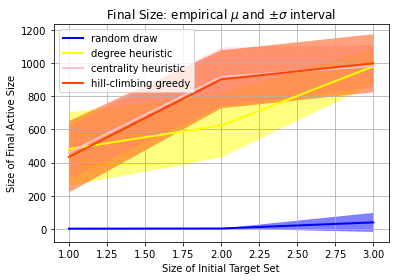

In [8]:
experiments_and_plot(multigraph, directed_graph,
                     max_k=3, num_exp=25, max_iter=500, exp_iter=50,
                     mode='linear threshold', p_cascade=0.01)

### Results on Independent Cascade Model with 1%

100%|██████████| 3/3 [00:25<00:00,  8.46s/it]


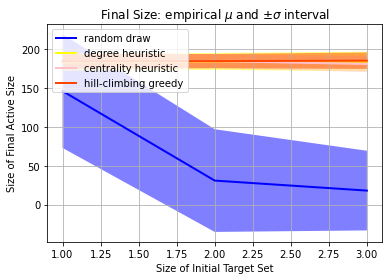

In [9]:
experiments_and_plot(multigraph, directed_graph,
                     max_k=3, num_exp=25, max_iter=500, exp_iter=50,
                     mode='independent cascade', p_cascade=0.01)

### Results on Weighted Cascade Model

100%|██████████| 3/3 [00:12<00:00,  4.32s/it]


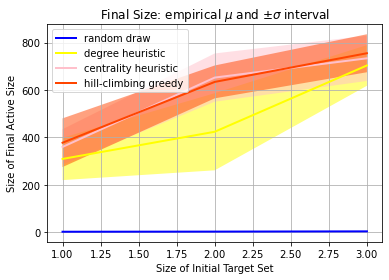

In [10]:
experiments_and_plot(multigraph, directed_graph,
                     max_k=3, num_exp=25, max_iter=500, exp_iter=50,
                     mode='weighted cascade', p_cascade=0.01)